In [5]:
%matplotlib widget
import matplotlib.pyplot as plt

Note: Execution of cells marked with '*' take very long for `occupancy grid width/height < 30` and `rotation_step > 30`

# 1) Occupancy Grid

### 1.1) Occupancy Grid Builder Function

In [131]:
import numpy as np

def add_obstacle(occupancy_grid, width, length, x, y):
    width_occ_grid = len(occupancy_grid[0])
    height_occ_grid = len(occupancy_grid)

    start_row = y
    end_row = min(height_occ_grid, y + length)
    start_col = x
    end_col = min(width_occ_grid, x + width)

    for row in range(start_row, end_row):
        for col in range(start_col, end_col):
            occupancy_grid[row][col] = False

    return occupancy_grid

def generate_empty_occupancy_grid(length, width):
    empty_occupancy_grid = np.ones((length, width), dtype=bool)

    return empty_occupancy_grid

### 1.2) Choose or modify scenario

In [81]:
# 1x2 Robot, 90° Rotation, 18x18 Occu. Grid, 1 Obstacle in middle

# Robotermaße
robot_width = 1
robot_length = 2

# Rotationsgranularität
rotation_step = 90

# Start- und Zielpunkt festlegen
start_point = (2, 14, 0)
goal_point = (13, 4, 0)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    width=18,
    length=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=3,
    x=7,
    y=8)

In [ ]:
# 1x1 Robot, 90° Rotation, 18x18 Occu. Grid, Trapped in "<"

# Robotermaße
robot_width = 1
robot_length = 1

# Rotationsgranularität
rotation_step = 90

# Start- und Zielpunkt festlegen
start_point = (7, 9, 0)
goal_point = (10, 6, 2)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=5,
    length=1,
    x=4,
    y=7)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=5,
    x=9,
    y=8)

In [ ]:
# 1x4 Robot, 45° Rotation, 18x18 Occu. Grid, Flipped + closed "U"
robot_width = 1
robot_length = 4

# Rotationsgranularität
rotation_step = 45

# Start- und Zielpunkt festlegen
start_point = (12, 8, 0)
goal_point = (15, 11, 4)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=10,
    length=1,
    x=4,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=15,
    x=13,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=10,
    length=1,
    x=4,
    y=16)

In [ ]:
# 1x4 Robot, 45° Rotation, 18x18 Occu. Grid, Flipped + opened "U"

# Robotermaße
robot_width = 1
robot_length = 4

# Rotationsgranularität
rotation_step = 45

# Start- und Zielpunkt festlegen
start_point = (12, 8, 0)
goal_point = (15, 11, 4)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=1,
    x=4,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=16,
    x=13,
    y=1)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=1,
    x=4,
    y=16)

In [129]:
# 3x5 Robot, 45° Rotation, 18x18 Occu. Grid, Multiple narrow spots

robot_width = 3
robot_length = 5

# Rotationsgranularität
rotation_step = 45

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (10, 16, 2)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=11,
    x=3,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=3,
    y=15)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=0,
    x=7,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=13,
    x=9,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=9,
    x=9,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=5,
    length=1,
    x=9,
    y=12)

In [132]:
# 1x6 Robot, 30° Rotation, 18x18 Occu. Grid, Gap in "|"
robot_width = 1
robot_length = 6

# Rotationsgranularität
rotation_step = 30

# Start- und Zielpunkt festlegen
start_point = (5, 2, 0)
goal_point = (12, 2,0)
current_position= start_point

occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=5,
    x=8,
    y=2)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=4,
    x=8,
    y=11)

In [41]:
# 3x5 Robot, 10° Rotation, 18x18 Occu. Grid, Multiple narrow spots

robot_width = 3
robot_length = 5

# Rotationsgranularität
rotation_step = 10

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (10, 16, 9)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(
    length=18,
    width=18
)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=11,
    x=3,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=3,
    x=3,
    y=15)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=3,
    length=0,
    x=7,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=13,
    x=9,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=1,
    length=9,
    x=9,
    y=4)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=5,
    length=1,
    x=9,
    y=12)

In [45]:
# 12x20 Robot, 10° Rotation, 80x50 Occu. Grid, Multiple narrow spots
robot_width = 12
robot_length = 20

# Rotationsgranularität
rotation_step = 10

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (56, 47, 9)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=80, length=50)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=24,
    x=20,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=10,
    x=20,
    y=40)
    

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=4,
    length=30,
    x=48,
    y=16)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=16,
    length=4,
    x=48,
    y=20)

In [51]:
# 24x40 Robot, 5° Rotation, 160x200 Occu. Grid, Multiple narrow spots
robot_width = 24
robot_length = 40

# Rotationsgranularität
rotation_step = 5

# Start- und Zielpunkt festlegen
start_point = (0, 0, 0)
goal_point = (112, 128, 18)
current_position=start_point

# Obstacles
occupancy_grid = generate_empty_occupancy_grid(width=160, length=200)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=88,
    x=40,
    y=0)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=64,
    x=40,
    y=120)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=24,
    length=0,
    x=64,
    y=32)
occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=8,
    length=160,
    x=96,
    y=32)

occupancy_grid = add_obstacle(
    occupancy_grid=occupancy_grid,
    width=32,
    length=8,
    x=96,
    y=96)

### 1.3) Plot Occupancy Grid

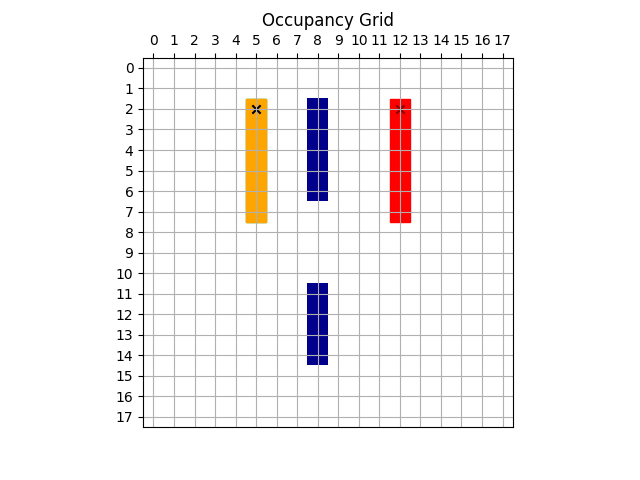

In [133]:
from matplotlib.colors import ListedColormap

def plot_occupancy_grid(occupancy_grid, goal_point, plot_axis, current_position=None, path=[], robot_width=None, robot_length=None, active=True, plot_title="Occupancy Grid", y_axis_label=None, start_point=None, ticks=True):
    plot_axis.clear()

    if active:
        cmap = ListedColormap(['darkblue', 'white'])        
        start_color = 'green'
        goal_color = 'red'
        path_color = 'blue'
        current_color = 'orange'
    else:
        cmap = 'gray'
        start_color = 'black'
        goal_color = 'dimgray'
        path_color = 'darkgray'
        current_color = 'gray'
        line_color = 'black'

    plot_axis.imshow(occupancy_grid, cmap=cmap, interpolation='none', origin='upper')

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[start_y, start_x]:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='x', label='Start Position')
            else:
                plot_axis.scatter(start_x, start_y, color=start_color, marker='o', label='Start Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            start_rect = plt.Rectangle(
                (start_x-0.5,  start_y-0.5),
                robot_width,
                robot_length,
                rotation_point=(start_x, start_y),
                angle=start_rotation * -rotation_step,  # Rotation in Grad umrechnen
                color=start_color,
                label='Start Position'
            )
            plot_axis.add_patch(start_rect)
            plot_axis.scatter(start_x, start_y, color='darkgreen', marker='x', label='Start Position')


    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[goal_y, goal_x]:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='x', label='Goal Position')
            else:
                plot_axis.scatter(goal_x, goal_y, color=goal_color, marker='o', label='Goal Position')
        else: # Darstellung des aktuellen Roboters als Rechteck
            goal_rect = plt.Rectangle(
                (goal_x-0.5, goal_y-0.5),
                robot_width,
                robot_length,
                rotation_point=(goal_x, goal_y),
                angle=goal_rotation * -rotation_step,  # Rotation in Grad umrechnen
                color=goal_color,
                label='Start Position'
            )
            plot_axis.add_patch(goal_rect)
            plot_axis.scatter(goal_x, goal_y, color='darkred', marker='x', label='Goal Position')

    plot_axis.plot([p[0] for p in path], [p[1] for p in path], color=path_color, label='Chosen Path')

    if current_position is not None:
        current_x, current_y, current_rotation = current_position
        if robot_width is None or robot_length is None:
            # Darstellung des aktuellen Roboters als x
            if not occupancy_grid[current_y, current_x]:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='x', label='Current Position')
            else:
                plot_axis.scatter(current_x, current_y, color=current_color, marker='o', label='Current Position')
                # Darstellung des aktuellen Roboters als Rechteck
        else:
            current_rect = plt.Rectangle(
                (current_x-0.5, current_y-0.5),
                robot_width,
                robot_length,
                rotation_point=(current_x, current_y),
                angle=current_rotation * -rotation_step,  # Rotation in Grad umrechnen
                color=current_color,
                label='Current Position'
            )
            plot_axis.add_patch(current_rect)
            plot_axis.scatter(current_x, current_y, color='black', marker='x', label='Current Position')

    plot_axis.grid(False)
    plot_axis.set_title(plot_title)

    # Beschriftung der X-Achse oben
    plot_axis.xaxis.tick_top()

    if ticks:
        plot_axis.set_xticks(range(occupancy_grid.shape[1]))
        plot_axis.set_yticks(range(occupancy_grid.shape[0]))
        plot_axis.grid()
    else:
        plot_axis.set_xticks([])
        plot_axis.set_yticks([])

    if y_axis_label is not None:
        # Optionale Beschriftung Y-Achse
        plot_axis.text(-0.15, 0.5, y_axis_label, rotation='horizontal', va='center', ha='right', transform=plot_axis.transAxes)


fig = plt.figure()
plot_axis = fig.add_subplot(111)
plot_occupancy_grid(
    occupancy_grid=occupancy_grid, 
    goal_point=goal_point, 
    current_position=current_position, 
    plot_axis=plot_axis, 
    robot_width=robot_width, 
    robot_length=robot_length,
    ticks=True,
    start_point=start_point)
plt.show()

# 2) Configuration Space

### 2.1) Compute Configuration Space

In [136]:
import numpy as np
from scipy.ndimage import rotate

def compute_robot_mask(robot_length, robot_width, rotation_angle):
    no_rotation_mask = np.ones((robot_length, robot_width))
    no_rotation_mask[0, 0] = np.inf
    rotated_mask = rotate(no_rotation_mask, rotation_angle, reshape=True, cval=0, order=0, mode='grid-constant', prefilter=True)

    if len(np.argwhere(np.isinf(rotated_mask))) == 0:

        rotated_mask_nearest = rotate(no_rotation_mask, rotation_angle, reshape=True, cval=0, order=0, mode='nearest', prefilter=True)
        inf_indices = np.argwhere(rotated_mask_nearest == np.inf)
        if len(inf_indices) == 0:
            raise Exception("Inf was interpolated in: " + str(rotated_mask_nearest))
        min_inf_y, min_inf_x = inf_indices[np.argmin(inf_indices[:, 0])]

        zero_indices = np.argwhere(rotated_mask == 0)

        rotated_mask_new_interpolated = np.ones(rotated_mask.shape)

        for y, x in zero_indices:
            rotated_mask_new_interpolated[y, x] = 0

        rotated_mask_new_interpolated[min_inf_y, min_inf_x] = np.inf

        if len(np.argwhere(rotated_mask_new_interpolated == np.inf)) == 0:
            raise Exception("Inf was interpolated in: " + str(rotated_mask_nearest))

        rotated_mask = rotated_mask_new_interpolated

    point_mirrored_mask = np.flipud(np.fliplr(rotated_mask)) # Punktspiegeln
    return point_mirrored_mask


def generate_computational_space(occupancy_grid, robot_mask):
    # Rand als Hindernis
    expanded_grid = np.pad(occupancy_grid, 1, constant_values=False)
    computational_space = np.copy(expanded_grid)

    # Koordinaten von 1 in der Robot Mask
    robot_mask_ones = np.argwhere(robot_mask == 1)

    inf_y, inf_x = np.argwhere(np.isinf(robot_mask))[0]

    # Relative Koordinaten von 1 in der Robot Mask zu np.inf
    robot_mask_ones_relative = robot_mask_ones - np.array([inf_y, inf_x])

    for one_relative_y, one_relative_x in robot_mask_ones_relative:
        # Iteriere über Hindernisse
        for obstacle_coord in np.argwhere(expanded_grid == False):
            obst_y, obst_x = obstacle_coord

            # Neue Koordinaten nach Anwendung der Relativverschiebung
            new_obst_y = obst_y + one_relative_y
            new_obst_x = obst_x + one_relative_x

            # Überprüfe, ob die neuen Koordinaten innerhalb der Grenzen von expanded_grid liegen
            if 0 <= new_obst_y < expanded_grid.shape[0] and 0 <= new_obst_x < expanded_grid.shape[1]:
                computational_space[new_obst_y, new_obst_x] = False

    return computational_space[1:-1, 1:-1]  # Entferne zusätzlich hinzugefügte Dimensionen


if 360 % rotation_step != 0:
    raise Exception("Rotationschritt muss Teiler von 360 sein")

current_rotation = 0
computational_space_list = []

rotations = np.arange(0, 360, rotation_step)

for current_rotation in rotations:
    current_robot_mask = compute_robot_mask(
        robot_length = robot_length,
        robot_width = robot_width,
        rotation_angle = current_rotation
    )
    current_computational_space = generate_computational_space(
        occupancy_grid=occupancy_grid,
        robot_mask=current_robot_mask
    )
    computational_space_list.append(current_computational_space)
    
computational_space = np.array(computational_space_list)

'''
# Beispielaufruf:
occupancy_grid = np.array([
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, False, True, True, True, True],
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, True, True, True, True, True],
    [True, True, True, True, True, True, True, True, True]
])

robot_mask = np.array([
    [0, 0,      0, 0, 0, 0, 0, 0, 0],
    [0, 0,      0, 1, 0, 0, 0, 0, 0],
    [0, 0,      1, 1, 1, 0, 0, 0, 0],
    [0, np.inf, 1, 1, 1, 1, 0, 0, 0],
    [0, 0,      1, 1, 1, 0, 0, 0, 0],
    [0, 0,      0, 1, 0, 0, 0, 0, 0],
    [0, 0,      0, 0, 0, 0, 0, 0, 0],
    [0, 0,      0, 0, 0, 0, 0, 0, 0],
    [0, 0,      0, 0, 0, 0, 0, 0, 0]
])

result = process_obstacles(occupancy_grid, robot_mask)
print(result)
'''


'\n# Beispielaufruf:\noccupancy_grid = np.array([\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, False, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True],\n    [True, True, True, True, True, True, True, True, True]\n])\n\nrobot_mask = np.array([\n    [0, 0,      0, 0, 0, 0, 0, 0, 0],\n    [0, 0,      0, 1, 0, 0, 0, 0, 0],\n    [0, 0,      1, 1, 1, 0, 0, 0, 0],\n    [0, np.inf, 1, 1, 1, 1, 0, 0, 0],\n    [0, 0,      1, 1, 1, 0, 0, 0, 0],\n    [0, 0,      0, 1, 0, 0, 0, 0, 0],\n    [0, 0,      0, 0, 0, 0, 0, 0, 0],\n    [0, 0,      0, 0, 0, 0, 0, 0, 0],\n    [0, 0,      0, 0, 0, 0, 0, 0, 0]\n])\n\nresult = proc

### 2.2) Plot Configuration Space

#### 2.2.1) Plot Sliced Occupancy Grids

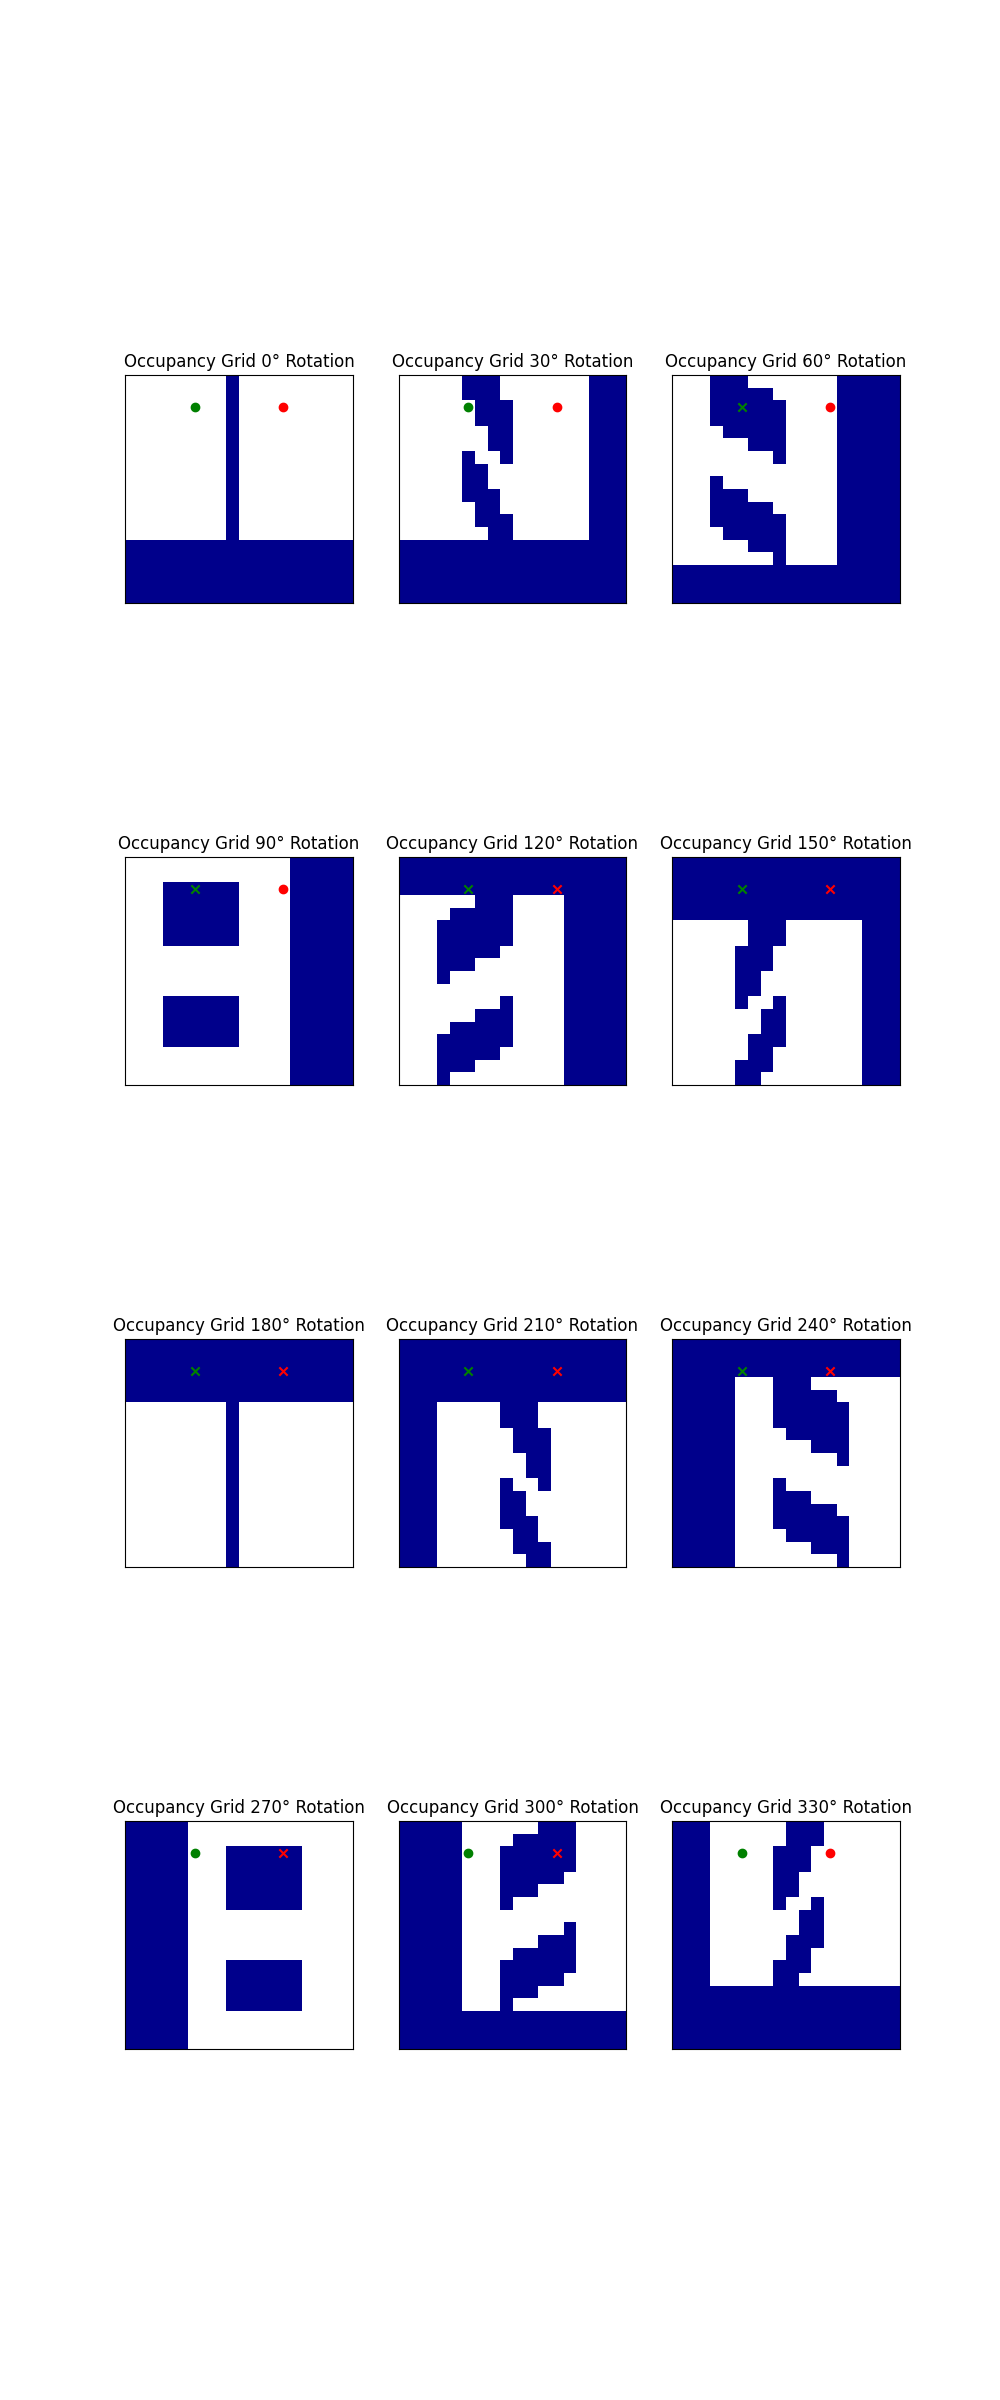

In [137]:
rotations = np.arange(0, 360, rotation_step)
fig = plt.figure(figsize=(10, 2*len(rotations)))

for index, rotation in enumerate(rotations):      
    ax_occupancy_grid = fig.add_subplot(int(np.ceil(len(rotations)/3)), 3, index+1)
    plot_occupancy_grid(
        occupancy_grid=computational_space[index], 
        goal_point=goal_point, 
        plot_axis=ax_occupancy_grid, 
        start_point=start_point,
        plot_title="Occupancy Grid " + str(rotation) + "° Rotation",
        ticks=False)
plt.show()

#### 2.2.2) Plot 3D Configuration Space*

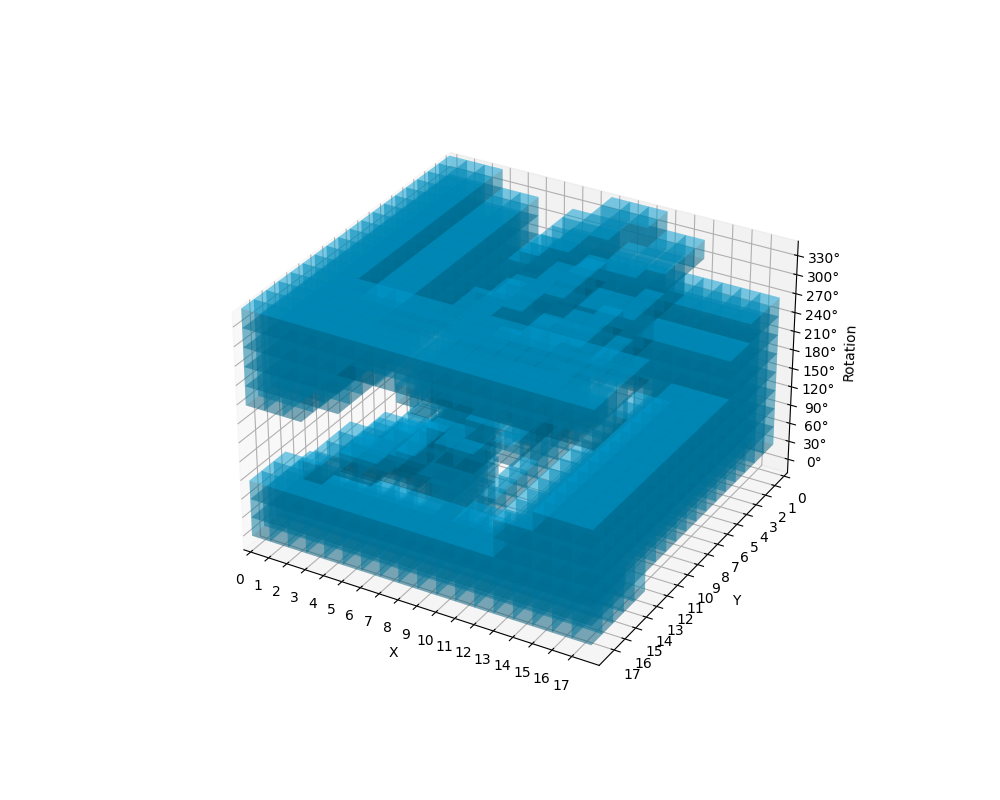

In [141]:
import numpy as np

def visualize_computational_space(computational_space, ax, force_field_x=None, force_field_y=None, force_field_rotation=None, start_point=None, goal_point=None, current_position=None):
    ax.clear()
    rotation, size_y, size_x = computational_space.shape

    if force_field_x is not None and force_field_y is not None and force_field_rotation is not None:
        if computational_space.shape != force_field_x.shape:
            raise Exception("Shape mismatch. computational_space.shape=" + str(computational_space.shape) + ", force_field_x.shape=" + str(force_field_x.shape))
        if computational_space.shape != force_field_y.shape:
            raise Exception("Shape mismatch. computational_space.shape=" + str(computational_space.shape) + ", force_field_y.shape=" + str(force_field_y.shape))
        if computational_space.shape != force_field_rotation.shape:
            raise Exception("Shape mismatch. computational_space.shape=" + str(computational_space.shape) + ", force_field_rotation.shape=" + str(force_field_rotation.shape))

        force_field_x_plot = np.nan_to_num(force_field_x)
        force_field_y_plot = np.nan_to_num(force_field_y)
        force_field_rotation_plot = np.nan_to_num(force_field_rotation)
        max_force = np.max(np.sqrt(force_field_x_plot**2 + force_field_y_plot**2 + force_field_rotation_plot**2))

    obstacle_color = 'deepskyblue'
    start_color = 'green'
    goal_color = 'red'
    current_color = 'orange'

    for r in range(rotation):
        for y in range(size_y):
            for x in range(size_x):
                if not computational_space[r, y, x]:
                    # Plotte einen Würfel mit gleichen Abmessungen in allen Richtungen
                    ax.bar3d(x - 0.5, y - 0.5, r, 1, 1, 1, color=obstacle_color, alpha=0.3)
                else:
                    if force_field_x is not None and force_field_y is not None and force_field_rotation is not None:
                        # Berechne die Länge des Kraftvektors für diesen Punkt
                        force_length = np.sqrt(force_field_x_plot[r, y, x]**2 + force_field_y_plot[r, y, x]**2 + force_field_rotation_plot[r, y, x]**2)
                        # Normalisiere den Kraftvektor auf den Bereich [0, 1]
                        length = force_length / max_force if max_force != 0 else 0
                        ax.quiver(x, y, r + 0.5, force_field_x_plot[r, y, x], force_field_y_plot[r, y, x], force_field_rotation_plot[r, y, x], color='blue', length=length, normalize=True)

    if start_point is not None:
        start_x, start_y, start_rotation = start_point
        # Plotte einen Würfel für den Startpunkt
        ax.bar3d(start_x - 0.5, start_y - 0.5, start_rotation, 1, 1, 1, color=start_color, alpha=0.5)

    if goal_point is not None:
        goal_x, goal_y, goal_rotation = goal_point
        # Plotte einen Würfel für den Zielpunkt
        ax.bar3d(goal_x - 0.5, goal_y - 0.5, goal_rotation, 1, 1, 1, color=goal_color, alpha=0.5)

    if current_position is not None:
        current_x, current_y, current_rotation = current_position
        # Plotte einen Würfel für die aktuelle Position
        ax.bar3d(current_x - 0.5, current_y - 0.5, current_rotation, 1, 1, 1, color=current_color, alpha=0.5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')

    # Invertiere die Y-Achse
    ax.invert_yaxis()

    # Passe die Skalierung der Z-Achse manuell an
    ax.set_xlim(0, size_x)
    ax.set_ylim(0, size_y)
    ax.set_zlim(0, rotation)

    # Passe die Z-Koordinaten an, um die Würfel über der XY-Ebene zu positionieren
    ax.set_box_aspect([size_x / rotation, size_y / rotation, 1])

    # Passe die Position der Z-Ticks an
    ax.set_zticks(np.arange(0, rotation, 1) + 0.5)
    ax.set_zticklabels([f'{angle}°' for angle in np.arange(0, 360, rotation_step)])

    # Passe die Position der X- und Y-Ticks an
    ax.set_xticks(np.arange(0, size_x, 1))
    ax.set_yticks(np.arange(0, size_y, 1))
    ax.invert_yaxis()

fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
visualize_computational_space(
    computational_space=computational_space, 
    goal_point=goal_point,
    start_point=start_point,
    ax=plot_axis)
plt.show()

# 3) Potential 

### 3.1) Compute Potential (Choose one algorithm)

#### Variant I: Attractive & Repulsive Potential

In [ ]:
import numpy as np

def compute_total_potential_attraction_repulsion(cs_space, goal, attraction_weight=3, repulsion_weight=0):
    size_rotation, size_y, size_x = cs_space.shape
    attraction_potential = np.zeros((size_rotation, size_y, size_x))
    repulsion_potential = np.zeros((size_rotation, size_y, size_x))

    for rotation in range(size_rotation):
        for y in range(size_y):
            for x in range(size_x):
                # Abstand zum Ziel
                distance_to_goal = np.sqrt((y - goal[1])**2 + (x - goal[0])**2)

                # Anziehendes Potential zum Ziel (Quadratische Funktion)
                attraction_potential[rotation, y, x] = distance_to_goal**2

                repulsive_potentials_to_all_objects = []
                # Abstand zu Hindernissen in der aktuellen Rotationsebene
                distances_to_obstacles = np.sqrt((y - np.where(cs_space[rotation] == False)[0])**2 +
                                                 (x - np.where(cs_space[rotation] == False)[1])**2)
                for distance_to_obstacle in distances_to_obstacles:
                    # Abstoßendes Potential von Hindernissen in der aktuellen Rotationsebene (Quadratische Funktion)
                    repulsive_potentials_to_all_objects.append((1 / (repulsion_weight + distance_to_obstacle)) if distance_to_obstacle != 0 else 1) # or repulsion_weight ???

                # Abstand zu Hindernissen in den benachbarten Rotationsebenen
                adjacent_rotations = [(rotation + 1) % size_rotation, (rotation - 1) % size_rotation]
                distances_to_obstacles_adjacent_grids = [(np.sqrt(
                                                        (y - np.where(cs_space[adj_rotation] == False)[0])**2 +
                                                        (x - np.where(cs_space[adj_rotation] == False)[1])**2)+
                                                        (rotation - adj_rotation)**2)
                                                    for adj_rotation in adjacent_rotations]
                
                for distances_to_obstacles_adjacent_grid in distances_to_obstacles_adjacent_grids:
                    for distance_to_obstacles_adjacent in distances_to_obstacles_adjacent_grid:
                        repulsive_potentials_to_all_objects.append((1 / (repulsion_weight + distance_to_obstacles_adjacent)) if distance_to_obstacles_adjacent != 0 else 1) # or repulsion_weight ???)
                                
                repulsion_potential[rotation, y, x] = np.max(repulsive_potentials_to_all_objects)
                

    normalized_attraction_potential = (attraction_potential / np.max(attraction_potential)) * attraction_weight
    #normalized_repulsion_potential = repulsion_potential #/ np.max(repulsion_potential)
    total_potential = normalized_attraction_potential + repulsion_potential
    total_potential[~computational_space] = np.nan

    return total_potential

total_potential = compute_total_potential_attraction_repulsion(
    cs_space=computational_space,
    goal=goal_point
)

#### Variant II: Wavefront Potential

In [142]:
import warnings

def compute_total_potential_wavefront(cs_space, goal):
    rotation_size, size_y, size_x = cs_space.shape
    goal_x, goal_y, goal_rotation = goal

    total_potential = np.zeros_like(cs_space, dtype=float)  # initialize with 0s
    total_potential[~cs_space] = np.nan # potential obstacles is undefined
    queue = [(goal_x, goal_y, goal_rotation, 2)]  # start with the goal
    visited = set([(goal_x, goal_y, goal_rotation)])

    while queue:
        current_x, current_y, current_rotation, current_potential = queue.pop(0)

        total_potential[current_rotation, current_y, current_x] = current_potential

        # Check neighbours in xy-boundary + not an obstacle + not visited
        for dr, dy, dx in [(0, -1, 0), (0, 1, 0), (0, 0, 1), (0, 0, -1), (-1, 0, 0), (1, 0, 0)]:
            next_rotation = (current_rotation + dr) % rotation_size
            next_y, next_x = current_y + dy, current_x + dx

            if 0 <= next_y < size_y and 0 <= next_x < size_x and \
               total_potential[next_rotation, next_y, next_x] is not np.nan and \
               total_potential[next_rotation, next_y, next_x] == 0 and \
               (next_x, next_y, next_rotation) not in visited:
                queue.append((next_x, next_y, next_rotation, current_potential + 1))
                visited.add((next_x, next_y, next_rotation))
    
    unreachable_points = np.argwhere(total_potential == 0)
    if len(unreachable_points) > 0:
        unreachable_points_exist = True
        warnings.warn("Unreachable points exist, setting as obstacles: " + str(unreachable_points))
        for unreachable_rotation, unreachable_y, unreachable_x in unreachable_points:
            total_potential[unreachable_rotation, unreachable_y, unreachable_x] = np.nan
            cs_space[unreachable_rotation, unreachable_y, unreachable_x] = False
    
    return total_potential

unreachable_points_exist = False

total_potential = compute_total_potential_wavefront(
    cs_space=computational_space,
    goal=goal_point
)

### 3.2) Plot Potential*

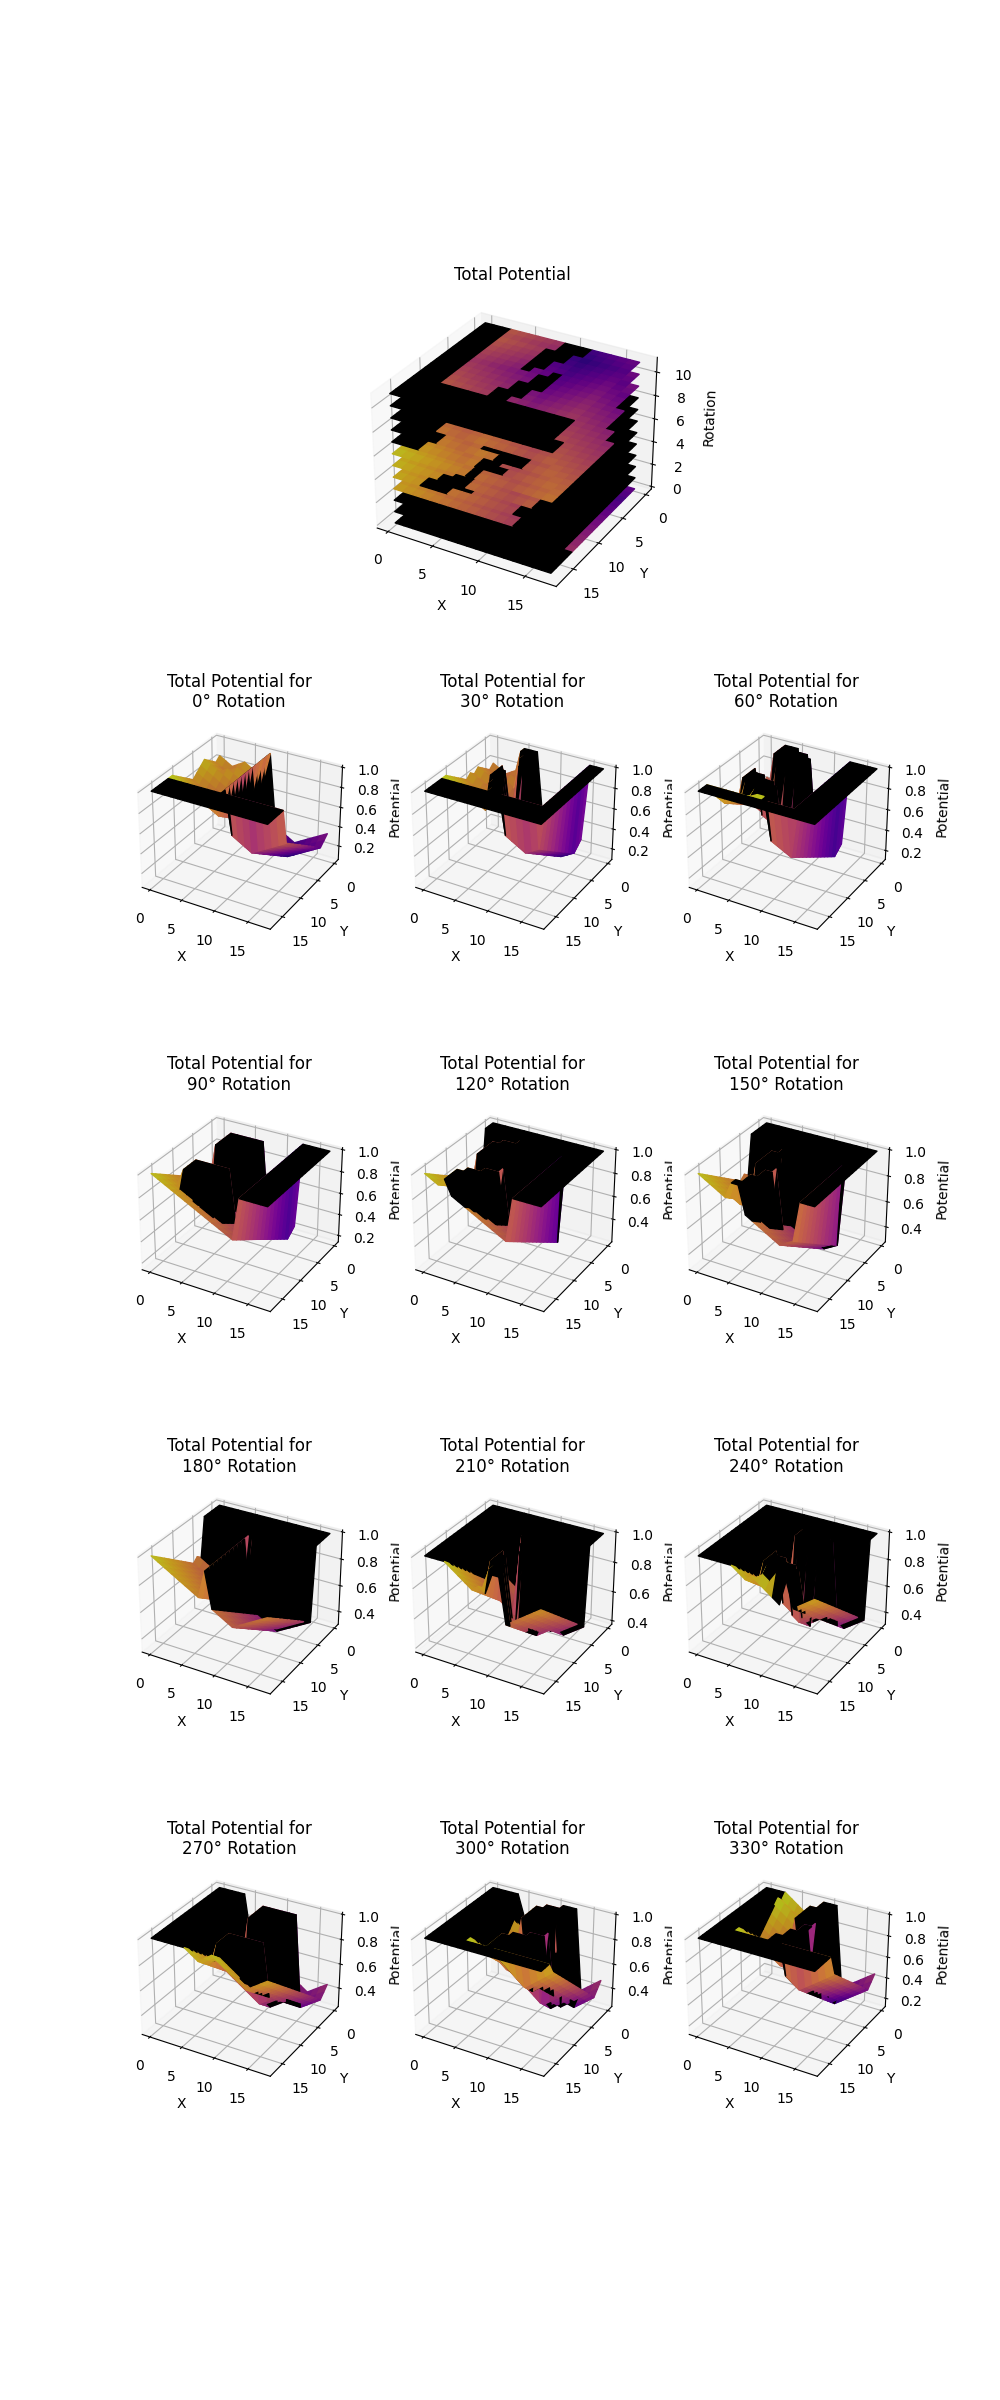

In [150]:
# Click on ">" to execute cell (Rotate the 3D Plots by clicking and moving the mouse)

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def visualize_total_potential_stacked(potential, title, ax):

    potential_plot = np.nan_to_num(potential)
    potential_plot = potential_plot/np.max(potential_plot)
    rotation, size_y, size_x = potential_plot.shape

    # Erzeuge ein Gitter im 3D-Raum
    x = np.arange(size_x)
    y = np.arange(size_y)
    X, Y = np.meshgrid(x, y)

    # Plotte die 3D-imshow für jede Rotationsebene
    for r in range(rotation):
        Z = np.full_like(X, r)  # Z-Koordinate auf Höhe der Rotationsebene
        colors = plt.cm.plasma(potential_plot[r, :, :])
        colors[np.isnan(potential[r, :, :])] = (0, 0, 0, 1.0)  # Graue Farbe für np.nan
        ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, alpha=1, antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Rotation')
    ax.set_title(title)
    ax.invert_yaxis()


def visualize_total_potential_slice(potential_slice, title, ax):
    obstacles = np.isnan(potential_slice)
    max_pot = np.max(np.nan_to_num(potential_slice))

    potential_slice_plot = np.copy(potential_slice)
    potential_slice_plot[obstacles] = max_pot

    potential_slice_plot = potential_slice_plot / np.max(potential_slice_plot)
    size_y, size_x = potential_slice_plot.shape

    # Erzeuge ein Gitter im 3D-Raum
    x = np.arange(size_x)
    y = np.arange(size_y)
    X, Y = np.meshgrid(x, y)

    Z = potential_slice_plot  # Set Z to the potential values

    colors = plt.cm.plasma(potential_slice_plot)
    colors[np.isnan(potential_slice)] = (0, 0, 0, 1.0) 
    ax.plot_surface(X, Y, Z, facecolors=colors, rstride=1, cstride=1, alpha=1, antialiased=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Potential')
    ax.set_title(title)
    ax.invert_yaxis()


rotations = np.arange(0, 360, rotation_step)
fig = plt.figure(figsize=(10, 2*len(rotations)))
ax_total_potential_stacked = fig.add_subplot(1 + int(np.ceil(len(rotations)/3)), 3, (1,3), projection='3d')
visualize_total_potential_stacked(total_potential, 'Total Potential', ax_total_potential_stacked)

for index, rotation in enumerate(rotations):      
    ax_total_potential_slice = fig.add_subplot(1 + int(np.ceil(len(rotations)/3)), 3, 4 + index, projection='3d')
    visualize_total_potential_slice(total_potential[index], 'Total Potential for\n' + str(rotation) + '° Rotation', ax_total_potential_slice)
plt.show()


# 4) Gradients ("Force Field")

### 4.1) Compute Gradients ("Force Field")

In [151]:
import warnings

def compute_gradients4(total_potential, goal_point):

    obstacles_mask = np.isnan(total_potential)
    
    # Kopiere die erste und letzte Ebene
    first_layer = total_potential[0, :, :]
    last_layer = total_potential[-1, :, :]

    # Füge die kopierten Ebenen oben und unten an
    total_potential_z_padded = np.concatenate([last_layer[np.newaxis, :, :], total_potential, first_layer[np.newaxis, :, :]], axis=0)

    # Berechne die Gradienten unter Berücksichtigung der erweiterten Ebenen
    gradient_z, gradient_y, gradient_x = np.gradient(total_potential_z_padded)

    # Die negierten Gradienten repräsentieren die Kräfte
    force_field_x = -gradient_x[1:-1, :, :]
    force_field_y = -gradient_y[1:-1, :, :]
    force_field_rotation = -gradient_z[1:-1, :, :]

    # Ersetze NaN-Gradienten (an Hindernissen) durch manuell berechneten Gradienten
    force_field_x[obstacles_mask] = np.nan
    force_field_y[obstacles_mask] = np.nan
    force_field_rotation[obstacles_mask] = np.nan

    # Gradienten an Grenzen "clippen"
    force_field_x[:, :, 0][force_field_x[:, :, 0] < 0] = 0  # Setze alle Gradienten am linken Rand auf 0, wenn sie < 0 sind
    force_field_x[:, :, -1][force_field_x[:, :, -1] > 0] = 0  # Setze alle Gradienten am rechten Rand auf 0, wenn sie > 0 sind
    force_field_y[:, 0, :][force_field_y[:, 0, :] < 0] = 0  # Setze alle Gradienten am oberen Rand auf 0, wenn sie < 0 sind
    force_field_y[:, -1, :][force_field_y[:, -1, :] > 0] = 0  # Setze alle Gradienten am unteren Rand auf 0, wenn sie > 0 sind

    return force_field_x, force_field_y, force_field_rotation


def compute_obstacle_gradients(force_field_x, force_field_y, force_field_rotation, total_potential):
    # This can create new local minima and plateaus:

    obstacle_coordinates = np.argwhere(np.isnan(total_potential))

    rotations_size = force_field_rotation.shape[0]

    nan_coordinates_force_field_x = np.argwhere(np.isnan(force_field_x))
    non_obstacle_nan_coordinates_force_field_x = set(map(tuple, nan_coordinates_force_field_x)) - set(map(tuple, obstacle_coordinates))
    #print("Number of non-obstacle 'force_field_x == nan' before: " + str(len(non_obstacle_nan_coordinates_force_field_x)))
    for z, y, x in non_obstacle_nan_coordinates_force_field_x:
        if x-1 >= 0 and np.isnan(total_potential[z, y, x-1]) and x+1 < total_potential.shape[2] and not np.isnan(total_potential[z, y, x+1]):
            # x is at "left border"
            gradient_manual_x = total_potential[z, y, x+1] - total_potential[z, y, x]
            force_field_x[z, y, x] = -gradient_manual_x if gradient_manual_x <= 0 else 0
        elif x+1 < total_potential.shape[2] and np.isnan(total_potential[z, y, x+1]) and x-1 >= 0 and not np.isnan(total_potential[z, y, x-1]):
            # x is at "right border"
            gradient_manual_x = total_potential[z, y, x] - total_potential[z, y, x-1]
            force_field_x[z, y, x] = -gradient_manual_x if gradient_manual_x >= 0 else 0
        elif x-1 < 0 or np.isnan(total_potential[z, y, x-1]) and x+1 >= total_potential.shape[2] or np.isnan(total_potential[z, y, x+1]):
            # is is between borders
            force_field_x[z, y, x] = 0

    nan_coordinates_force_field_x = np.argwhere(np.isnan(force_field_x))
    non_obstacle_nan_coordinates_force_field_x = set(map(tuple, nan_coordinates_force_field_x)) - set(map(tuple, obstacle_coordinates))
    if len(non_obstacle_nan_coordinates_force_field_x) > 0:
        warnings.warn("Unresolved 'force_field_x == nan' at: " + str(non_obstacle_nan_coordinates_force_field_x))
    #else:
        #print("Number of non-obstacle 'force_field_x == nan' after: " + str(len(non_obstacle_nan_coordinates_force_field_x)))

    nan_coordinates_force_field_y = np.argwhere(np.isnan(force_field_y))
    non_obstacle_nan_coordinates_force_field_y = set(map(tuple, nan_coordinates_force_field_y)) - set(map(tuple, obstacle_coordinates))
    #print("Number of non-obstacle 'force_field_y == nan' before: " + str(len(non_obstacle_nan_coordinates_force_field_y)))
    for z, y, x in non_obstacle_nan_coordinates_force_field_y:
        if y-1 >= 0 and np.isnan(total_potential[z, y-1, x]) and y+1 < total_potential.shape[1] and not np.isnan(total_potential[z, y+1, x]):
            # y is at "top border"
            gradient_manual_y = total_potential[z, y+1, x] - total_potential[z, y, x]
            force_field_y[z, y, x] = -gradient_manual_y if gradient_manual_y <= 0 else 0   
        elif y+1 < total_potential.shape[1] and np.isnan(total_potential[z, y+1, x]) and y-1 >= 0 and not np.isnan(total_potential[z, y-1, x]):
            # y is at "bottom border"
            gradient_manual_y = total_potential[z, y, x] - total_potential[z, y-1, x]
            force_field_y[z, y, x] = -gradient_manual_y if gradient_manual_y >= 0 else 0
        elif y+1 >= total_potential.shape[1] or np.isnan(total_potential[z, y+1, x]) and y-1 < 0 or np.isnan(total_potential[z, y-1, x]):
            # y is between borders
            force_field_y[z, y, x] = 0


    nan_coordinates_force_field_y = np.argwhere(np.isnan(force_field_y))
    non_obstacle_nan_coordinates_force_field_y = set(map(tuple, nan_coordinates_force_field_y)) - set(map(tuple, obstacle_coordinates))
   
    if len(non_obstacle_nan_coordinates_force_field_y) > 0:
        warnings.warn("Unresolved 'force_field_y == nan' at: " + str(non_obstacle_nan_coordinates_force_field_y))
    #else:
        #print("Number of non-obstacle 'force_field_y == nan' after: " + str(len(non_obstacle_nan_coordinates_force_field_y)))

    nan_coordinates_force_field_rotation = np.argwhere(np.isnan(force_field_rotation))
    non_obstacle_nan_coordinates_force_field_rotation = set(map(tuple, nan_coordinates_force_field_rotation)) - set(map(tuple, obstacle_coordinates))
    #print("Number of non-obstacle 'force_field_rotation == nan' before: " + str(len(non_obstacle_nan_coordinates_force_field_rotation)))
    for z, y, x in non_obstacle_nan_coordinates_force_field_rotation:
        if np.isnan(total_potential[(z+1) % rotations_size, y, x]) and not np.isnan(total_potential[(z-1) % rotations_size, y, x]):
            # z is at "upper border"
            gradient_manual_z = total_potential[z, y, x] - total_potential[(z-1) % rotations_size, y, x] # caution!
            force_field_rotation[z, y, x] = -gradient_manual_z if gradient_manual_z >= 0 else 0  # caution!
        elif np.isnan(total_potential[(z-1) % rotations_size, y, x]) and not np.isnan(total_potential[(z+1) % rotations_size, y, x]):
            # z is at "lower border"
            gradient_manual_z = total_potential[(z+1) % rotations_size, y, x] - total_potential[z, y, x]
            force_field_rotation[z, y, x] = -gradient_manual_z if gradient_manual_z <= 0 else 0
        elif np.isnan(total_potential[(z-1) % rotations_size, y, x]) and np.isnan(total_potential[(z+1) % rotations_size, y, x]):
            # z is between borders
            force_field_rotation[z, y, x] = 0


    nan_coordinates_force_field_rotation = np.argwhere(np.isnan(force_field_rotation))
    non_obstacle_nan_coordinates_force_field_rotation = set(map(tuple, nan_coordinates_force_field_rotation)) - set(map(tuple, obstacle_coordinates))
    if len(non_obstacle_nan_coordinates_force_field_rotation) > 0:
        warnings.warn("Unresolved 'force_field_rotation == nan' at: " + str(non_obstacle_nan_coordinates_force_field_rotation))
    #else:
        #print("Number of non-obstacle 'force_field_rotation == nan' after: " + str(len(non_obstacle_nan_coordinates_force_field_rotation)))

def fix_local_maxima(force_field_x, force_field_y, force_field_rotation, total_potential, goal_point):
    obstacles_mask = np.isnan(total_potential)
    goal_x, goal_y, goal_rotation = goal_point

    rotations_size = force_field_rotation.shape[0]

    local_extrema_with_goal_before = np.argwhere((force_field_x == 0) & (force_field_y == 0) & (force_field_rotation == 0) & ~obstacles_mask)
    # Index des Eintrags zum Entfernen finden
    local_extrema_before = np.delete(
        local_extrema_with_goal_before,
        np.where(
            (local_extrema_with_goal_before[:, 0] == goal_rotation) &
            (local_extrema_with_goal_before[:, 1] == goal_y) &
            (local_extrema_with_goal_before[:, 2] == goal_x))[0],
        axis=0)    
    
    for z, y, x in local_extrema_before:

        if x-1 >= 0 and total_potential[z, y, x-1] is not np.nan and\
           x+1 < force_field_x.shape[2] and total_potential[z, y, x-1] is not np.nan:
           # due to implementation of "compute_gradients", local x-axis maxima cannot exist at x-axis border or next to x-axis obstacle

            if total_potential[z, y, x+1] < total_potential[z, y, x]:
                # local x-axis maxima found at (total_potential[z,y,x-1] < total_potential[z,y,x] > total_potential[z,y,x+1]) 
                gradient_local_max_x = total_potential[z, y, x+1] - total_potential[z, y, x] # Naive decision: Go to right neighbour
                force_field_x[z, y, x] = -gradient_local_max_x


        if y-1 >= 0 and total_potential[z, y-1, x] is not np.nan and\
           y+1 < force_field_x.shape[2] and total_potential[z, y+1, x] is not np.nan:
           # due to implementation of "compute_gradients", local x-axis maxima cannot exist at y-axis border or next to y-axis obstacle

            if total_potential[z, y-1, x] < total_potential[z, y, x]:
                # local maxima in (total_potential[z,y-1,x] < total_potential[z,y,x] > total_potential[z,y+1,x]) found
                gradient_local_min_y = total_potential[z, y-1, x] - total_potential[z, y, x] # Naive decision: Go to top neighbour
                force_field_x[z, y, x] = gradient_local_min_y

        if total_potential[(z+1) % rotations_size, y, x] is not np.nan and\
           total_potential[(z-1) % rotations_size, y, x] is not np.nan:
           # due to implementation of "compute_gradients", local z-axis maxima cannot exist next to z-axis obstacles

            if total_potential[(z+1) % rotations_size, y, x] < total_potential[z, y, x]:
                # local maxima in total_potential[(z-1) % rotations_size, y, x] < total_potential[z,y,x] > total_potential[(z+1) % rotations_size, y, x] found
                gradient_local_min_rotation = total_potential[(z+1) % rotations_size, y, x] - total_potential[z, y, x]
                force_field_rotation[z, y, x] = -gradient_local_min_rotation


    local_extrema_after_with_goal = np.argwhere((force_field_x == 0) & (force_field_y == 0) & (force_field_rotation == 0) & ~obstacles_mask)
    local_extrema_after = np.delete(
        local_extrema_after_with_goal,
        np.where(
            (local_extrema_after_with_goal[:, 0] == goal_rotation) &
            (local_extrema_after_with_goal[:, 1] == goal_y) &
            (local_extrema_after_with_goal[:, 2] == goal_x))[0],
        axis=0)    
    if len(local_extrema_after) > 0:
        warnings.warn("Local force minima or plateau at: " + str(local_extrema_after))

force_field_x, force_field_y, force_field_rotation = compute_gradients4(total_potential, goal_point)
compute_obstacle_gradients(force_field_x, force_field_y, force_field_rotation, total_potential)
fix_local_maxima(force_field_x, force_field_y, force_field_rotation, total_potential, goal_point)

### *4.2) Plot Gradients ("Force Field")

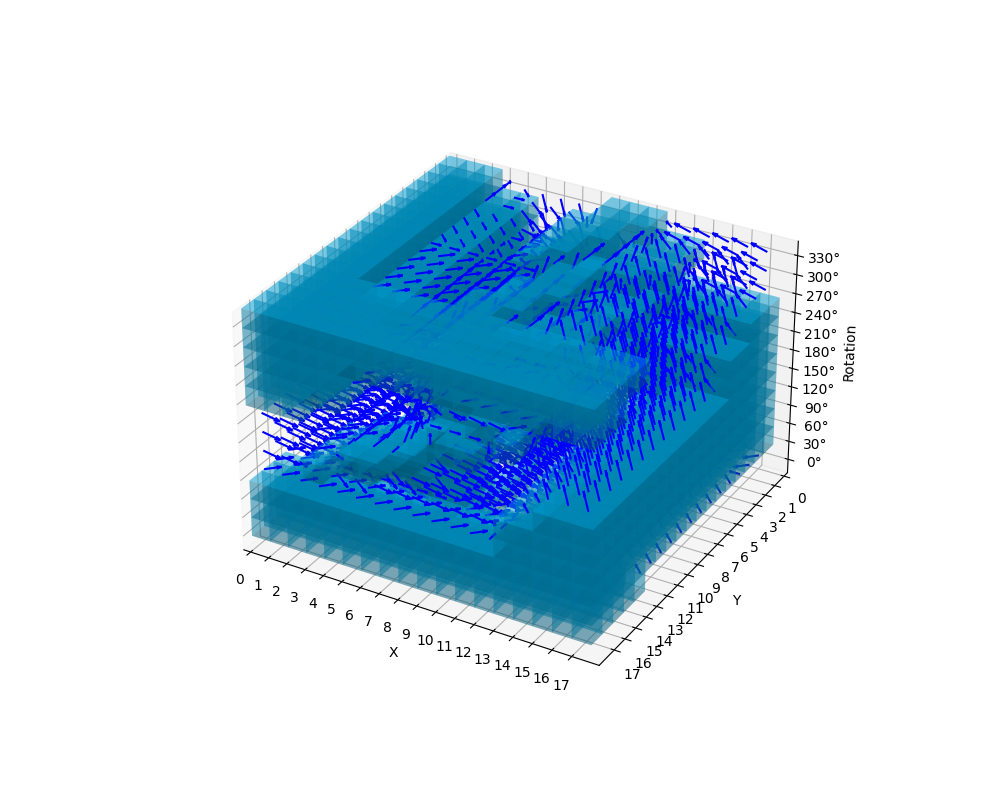

In [152]:
fig = plt.figure(figsize=(10, 8))
plot_axis = fig.add_subplot(111, projection='3d')
visualize_computational_space(
    computational_space=computational_space, 
    force_field_x=force_field_x, 
    force_field_y=force_field_y, 
    force_field_rotation=force_field_rotation, 
    goal_point=goal_point, 
    ax=plot_axis)
plt.show()

# 5) Gradient Descent

### 5.1) Visualization

In [28]:
# Parameters for visualization (DEACTIVATE FOR LARGE DIMENSIONS!)

# Set true only for width/height < 30px
plot_computational_space_3D = False

# Set true only for rotation_step > 30°
plot_rotation_occupancy_grids = False

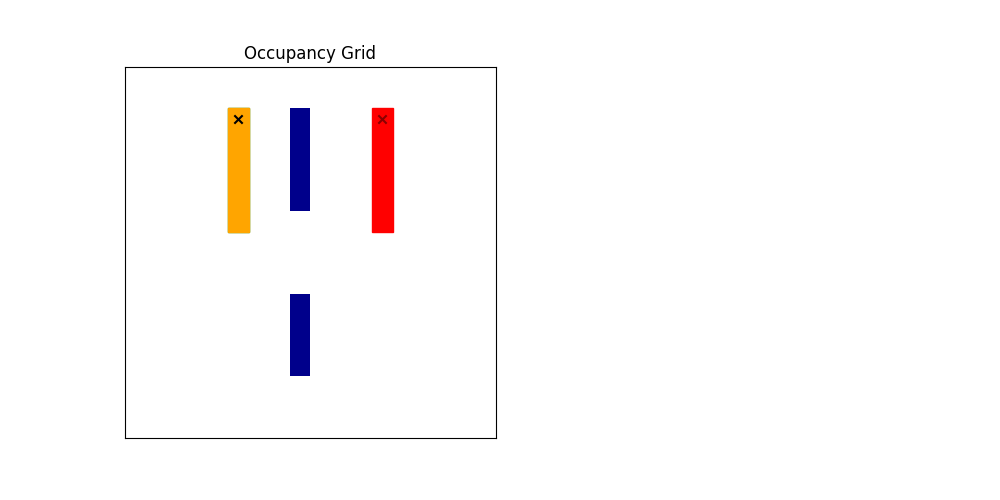

In [153]:
# Initalize plots for gradient descent

if plot_rotation_occupancy_grids:    
    rotations = np.arange(0, 360, rotation_step)
else:
    rotations = []

fig = plt.figure(figsize=(10, 5 + 3 * len(rotations)))
ax_occupancy_grid = fig.add_subplot(1 + int(np.ceil(len(rotations)/4)), 4, (1,2))

ax_cs_2D = []
for index, rotation in enumerate(rotations):      
    ax_cs_2D.append(fig.add_subplot(1 + int(np.ceil(len(rotations)/4)), 4, index+1))

if plot_computational_space_3D:
    ax_cs_3D = fig.add_subplot(1 + int(np.ceil(len(rotations)/4)), 4, (3,4), projection='3d')

path = []

def updatePlots():
    
    plot_occupancy_grid(
        occupancy_grid=occupancy_grid,
        start_point=start_point,
        goal_point=goal_point,
        current_position=current_position,
        robot_width=robot_width,
        robot_length=robot_length,
        plot_axis=ax_occupancy_grid,
        ticks=False
    )

    if plot_computational_space_3D:
        visualize_computational_space(
            computational_space=computational_space, 
            force_field_x=force_field_x, 
            force_field_y=force_field_y, 
            force_field_rotation=force_field_rotation, 
            start_point=start_point,
            goal_point=goal_point, 
            current_position=current_position,
            ax=ax_cs_3D)

    for index, rotation in enumerate(rotations):      
        plot_occupancy_grid(
            occupancy_grid=computational_space[index], 
            goal_point=goal_point, 
            plot_axis=ax_cs_2D[index], 
            start_point=start_point,
            plot_title="Occupancy Grid " + str(rotation) + "° Rotation",
            ticks=False)

    fig.canvas.draw()

updatePlots()

### 5.2) Start Gradient Descent

In [154]:
# Start and watch figure above

from time import sleep

def gradient_descent_step(current_position, force_field_x, force_field_y, force_field_rotation, path, goal_point):

    if current_position == goal_point:
        raise Exception("DONE!")

    x, y, rotation = current_position

    force_x = force_field_x[rotation, y, x]
    force_y = force_field_y[rotation, y, x]
    force_rotation = force_field_rotation[rotation, y, x]

    if force_x is np.nan or force_y is np.nan or force_rotation is np.nan:
        raise Exception("Obstacle hit at: x=" + str(x) + ", y=" + str(y) + ", rotation=" + str(rotation))

    # Füge die aktuelle Position zum Pfad hinzu
    path.append((x, y, rotation))

    possible_moves = []

    if abs(force_x) != 0 and abs(force_x) >= abs(force_y) and abs(force_x) >= abs(force_rotation):
        new_x = x + 1 if force_x > 0 else x - 1
        if 0 <= new_x < force_field_y.shape[2]:
            possible_moves.append((new_x, y, rotation))
    
    if abs(force_y) != 0 and abs(force_y) >= abs(force_x) and abs(force_y) >= abs(force_rotation):
        new_y = y + 1 if force_y > 0 else y - 1
        if 0 <= new_y < force_field_y.shape[1]:
            possible_moves.append((x, new_y, rotation))
    
    if abs(force_rotation) != 0 and abs(force_rotation) >= abs(force_x) and abs(force_rotation) >= abs(force_y):
        new_rotation = (rotation + 1) % len(force_field_rotation) if force_rotation > 0 else (rotation - 1) % len(force_field_rotation)
        possible_moves.append((x, y, new_rotation))

    # Überprüfe, ob die neue Position bereits im Pfad enthalten ist
    valid_moves = [move for move in possible_moves if move not in path]

    if goal_point in valid_moves:
        return goal_point

    if valid_moves:
        return max(valid_moves, key=lambda move: abs(force_field_x[move[2], move[1], move[0]]) + abs(force_field_y[move[2], move[1], move[0]]) + abs(force_field_rotation[move[2], move[1], move[0]]))
    else:
        raise Exception("Local mininum or plateau at x=" + str(x) + ", y=" + str(y) + ", z=" + str(rotation))


while True:    
    current_position = gradient_descent(
                        current_position=current_position,
                        force_field_x=force_field_x,
                        force_field_y=force_field_y,
                        force_field_rotation=force_field_rotation,
                        path=path,
                        goal_point=goal_point)  
    updatePlots()    
    sleep(0.01)


Exception: DONE!